# EngineDJG Dials For Engine And Energy Data

_DashT EngineDGJ_ Dials are intended for engine and energy data originating typically from NMEA-2000 databus of your boat. The data is read through a Signal K node server.

>"_D_" as dial, "_JG_" as [justGage](https://github.com/toorshia/justgage) - thanks for the great dial, folks!

## Introduction

_DashT EngineDGJ_ Dials are created using modern web techniques, incorporated  in OpenCPN Dashboard:

* A dedicated instrument for Engine and Energy data in Signal K data format
  * Gets data from DashT plug-in by subscription
* Data obtained from a single Signal K node server interconnection
  * Allowing multiplication of instruments _ad infinitum_
  * Instrument is not making data connections, connects only to DashT
* Does not interfere with NMEA-0183 data push toward the "traditional" Dashboard instruments
  * Your good old instruments receiving their data from OpenCPN will continue to work as before
* HTML5 and JavaScript based
  * Plain text customization files provided
  * Loading from the same or from a remote computer

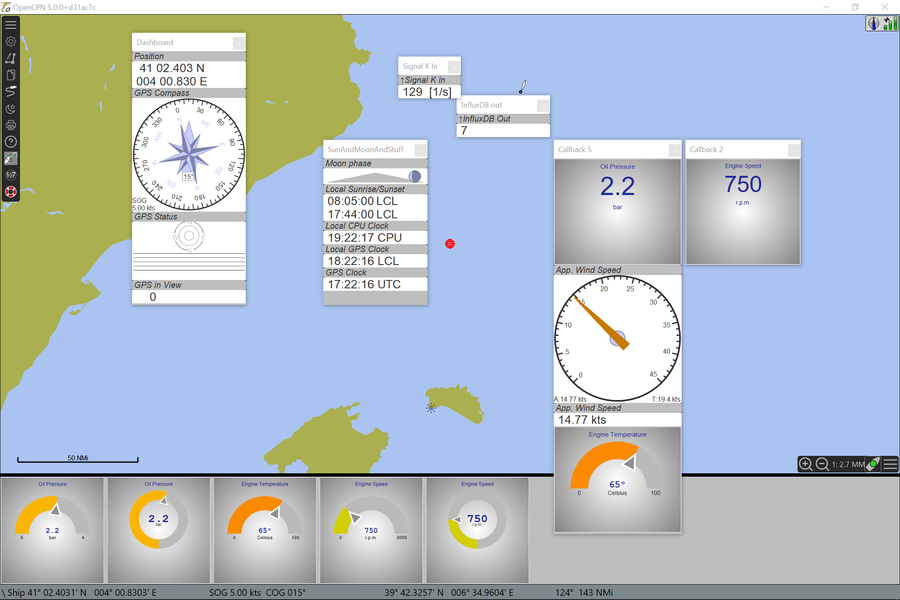

In [1]:
from IPython.display import Image
Image(filename='img/s_2020-02-13_DashT_EngineDJG_proto_screenshot.png')

[(zoom)](img/2020-02-13_DashT_EngineDJG_proto_screenshot.png)

## NMEA-2000 as data source

NMEA-2000, a derivation of the CAN data bus is the most likely commodity off the shelf (COTS) source for engine and energy data on boats with recent electronics (albeit it may have a commercial name for © and ® business reasons). Shortly, what the CAN-bus is doing in your car, NMEA-2000 is used to the same in your boat. NMEA-0183 remains, of course a data source for other DashT instruments but not for EngineDJG instruments.

## Signal K as data interchange protocol

[Signal K](https://opencpn.org/wiki/dokuwiki/doku.php?id=opencpn:supplementary_software:signalk), a modern and open data format for marine use is a protocol understood by DashT for data interchange over the network. [Signal K keys](https://github.com/SignalK/specification/blob/master/gitbook-docs/keys.md) are defined for each data source, called below **data paths**. An EngineDJG instrument subscribes to the data coming from one of the data path using a Signal K key. 

In order to use EngineDJG instrument in DashT, one needs therefore to have a _Signal K server node_ interfacing with the boat's instrumentation NMEA-2000 databus. It is available for [Raspberry PI/Linux](https://github.com/SignalK/signalk-server-node/blob/master/raspberry_pi_installation.md), for [Windows](https://opencpn.org/wiki/dokuwiki/doku.php?id=opencpn:supplementary_software:signalk:a3) and eventually on Mac, since is based on [node.js](https://nodejs.org). Please read more from **_O_**penCPN [supplementary software pages](https://opencpn.org/wiki/dokuwiki/doku.php?id=opencpn:supplementary_software:signalk).

## How it works

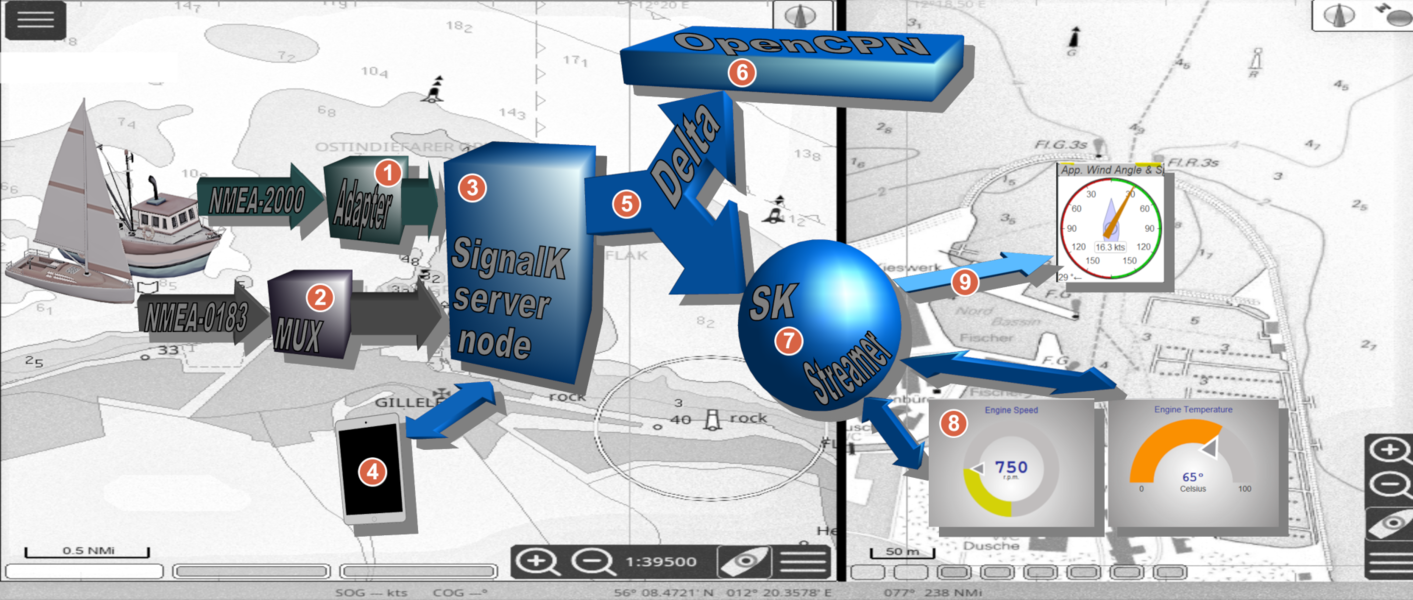

In [2]:
from IPython.display import Image
Image(filename='img/s_2020-02-13_DashT_EngineDJG_SK_diagram_enumerated.png')

[(zoom)](img/2020-02-13_DashT_EngineDJG_SK_diagram_enumerated.png)

(**1**). NMEA-2000 databus is the source of the engine and energy data for the EngineDJG instrument.

>There may be other, potential data sources which can be enabled in the future, such as IoT capable sensors, Bluetooth Low Energy (BLE) and General Purpose I/O pins (GPIO) but for now, only NMEA-2000 is selected as data source.

(**2**). In case the NMEA-2000 databus does not provide navigational data, needed by **_O_**penCPN and displayed by other DashT instruments, your boat probably sports also a classic NMEA-0183 wired sensors and instruments. They end up, typically into a multiplexer (MUX), which interfaces simply with the Signal K server node either by a USB connection, Ethernet connection or WiFi.

(**3**). Signal K node server, or a commercial Signal K data enabled router / multiplexer is entirely network enabled and can locate anywhere in your boat, not necessarily on the same computer where one is running **_O_**penCPN and DashT

>Signal K data format is a standard for data interchange. A server implements and a client uses that data format. For example "Signal K server node" is not "Signal K", it is one of its implementations but there are others. See [this list](https://opencpn.org/wiki/dokuwiki/doku.php?id=opencpn:supplementary_software:signalk:a2) of open source and commercial products available.

(**4**). For example, one can have immediately access from the cockpit table to the rich set of instruments, plug-ins and features Signal K server node provides

(**5**). Signal K standard defines and a server node provides, among its other networked data interchange interfaces, so-called Delta-channel, where all the changes in the boat data is available. When the boat has a NMEA-2000 databus this usually means a lot of data and many Signal K keys. Clients can subscribe to all of this data or to some selected keys only.

(**6**). **_O_**PenCPN has developed an interface to Signal K. Of course, it is not a consumer of engine data and it is not even remotely interested in knowing if the ice cube machine is still working but it needs the time, position and other navigational data for its routing and map functions. Also, it needs to feed the majority of its plug-ins - including DashT - with NMEA-0183 data through its internal multiplexer gateway towards these third party consumers. Even though the Signal K Delta channel interface would not be used in **_O_**penCPN, a Signal K server node is able to provide the data in NMEA-0183 format to the chartplotter.

(**7**). DashT plug-in for **_O_**penCPN chartplotter contains an efficient, built-in Signal K data streamer. It subscribes to _all_ data a Signal K server sends over the Delta channel and distributes the data to its own subscribers over a very efficient call-back function mechanism. This way, it makes gain in speed and lowers the number of network connections to the Signal K node server, reducing its workload.

(**8**). The EngineDJG instrument comes only in one flavour, unlike other DashT's "traditional" Dashboard navigational instruments which are hard-coded for their intended usage. An EngineDJG instrument is configured after its creation. The user of the instrument is provided with a list of available Signal K keys. Only one of the keys can be selected per instrument. The origin of the data must be a NMEA-2000 data source, currently. The data must be presented as a numerical value  which makes 0/1 type of status information not likely candidate to be shown nicely on these instruments. Three possible presentations are provided, a dial in 180 degrees, a donut in 360 degrees and a simple numerical output. One swap between the presentation styles with Ctrl+arrowUp or Ctrl+arrowDown keys.

(**9**).  The traditional Dashboard instruments, such as wind data and similar are subscribed automatically to the corresponding Signal K key. If it is not available, they will receive the data as before, from the **_O_**penCPN's NMEA-0183 distribution channel.

## Installation

The EngineDJG gauge does not require any additional installations, all the components are incorporated in the plug-in and ready to use.

## Signal K server node

If you have already in your boat a Signal K server node running on a computer, interfacing with and reading data from your boat's NMEA-2000 bus or from its commercial derivations, you are all set!

In the opposite case, please read first the [Signal K overview](http://signalk.org/overview.html). Few implementations exists for the servers providing Signal K data. There is an [OpenCPN supplementary software documentation page](https://opencpn.org/wiki/dokuwiki/doku.php?id=opencpn:supplementary_software:signalk) which provides you more information about the available servers. 

One of the server implementations providing fast and reliable networked data in Signal K data interchange format is [Signal K server node](https://github.com/SignalK/signalk-server-node) - please avoid the pitfall suggested by the name: "Signal K server node" is not "Signal K data format" and vice versa but a server implementation using that data format. The _node_ in Signal K server node means that it implemented as a JavaScript server node for [Node.js](https://nodejs.org/en/) which is a "_JavaScript runtime built on Chrome's V8 JavaScript engine_". Both Node.js and the Signal K server implementation are very robust and highly network communication efficients.

A typical configuration would take the advantage of those communication abilities by making the Signal K server node running on the boat's computer, which can be typically an embedded device connection to the boat's instrumentation bus, Bluetooth or IoT devices and, why not, running also the **_O_**penCPN chartplotter - the power of the recent embedded boards is astonishing and they come with 4K screen support making them a perfect low-power fit for the chart table.

Since we can communicate within a networked boat and perhaps even out of it with alarms and such, a typical installation would consist an external navigation computers with **_O_**penCPN chartplotter and DashT plug-in, phones and tables alike which can be taken to the cockpit.

Now, when you have a Signal K node server in your boat's installation and can use, for example your tablet to connect to the Signal K server and its built-in instrument support, you can do alike with the DashT EngineDJG instruments and integrate the same information in the Dashboard of the **_O_**penCPN chartplotter.

>A comprehensive Developer's Guide is provided in DashT documentation set for those who prefer to go a different way by forking this project and adapting it to their ideas and likings.

## Configuration

This chapter is addressing the first time configuration - _i.e._ the adaptation into the networked infrastructure of your boat - and the configuration of DashT EngineDJG instruments themselves.

### Adaptation into your boat's network infrastructure

This part is about impossible to automate since probably only you know where things are running in your boat! The good news is that since you have already a Signal K server node up and running and the network connections all set, we just need to use those connections and use their settings!

#### Signal K streamer

Signal K streamer is used not only by DashT EngineDJG instruments, therefore it has its own user's guide in DashT documentation. Make it work first, otherwise no data will flow in and no data sources can be selected.

#### Making DashT EngineDJG instruments available on network

The instrument is composed of a HTML file and numerous JavaScript files, like any other browser based application. The configuration task consist of making them available on your boat's network. It contains many elements being platform specific, explained in below sections.

>NOTE: one may be tempted to use _file://_ protocol. Please note that in Windows, starting from  [security update of 2020-01-14](https://support.microsoft.com/en-us/help/4534251/cumulative-security-update-for-internet-explorer) local storage capability, including cookies is disabled for _file://_ protocol in the back-end the wxWidgets is using on Windows (IE). Therefore we address below only the usage of _http://_ protocol to retrieve files from your files infrastructure to enable persistent EngineDJG configuration settings across platforms.

##### DashT EngineDJG publishing on Linux

First, you have to identify where are the DashT EngineDJG files after the installation and export the directory:

`/usr/share/opencpn/plugins/dashboard_tactics_pi/data/instrujs/`

##### Apache2 server

Most of the Linux systems provide Apache2 server by default and even start it by default. Navigate to your Linux box's network IP-address and you will soon find out if this is the case. Otherwise, it is not a big task to get it running but for clarity we presume now that it is already active. You would say:

`sudo ln -s /usr/share/opencpn/plugins/dashboard_tactics_pi/data/instrujs /var/www/html/instrujs`

Check that it works:

NOTE 1: The IP-address is an example only, use your own - also the content of the directory changes with more DashT _instrujs_ instruments becoming available):

NOTE 2: The actual content of the directory changes with more DashT _instrujs_ instruments becoming available

![2020-02-15_Apache2_check_instrujs.png](2020-02-15_Apache2_check_instrujs.png)

##### http-server node

Since you already have a Signal K server node you have thus _node.js_. If the above Apache2 method seems like an overkill to you, there is this dead simple solution:

`npm install -g http-server`

If you take a look at the DashT distribution directory above, you will find a shell script `httpserver.sh`. It contains simply:

```
#!/usr/bin/env bash
http-server /usr/share/opencpn/plugins/dashboard_tactics_pi/data/instrujs/ -p 8088
```

Execute the script, leave the http-server running and verify that files are available on the port `8088` (you can modify the port, of course):

```
pi@pi:~/dev/dashboard_tactics_pi/data/instrujs/scripts $ ./httpserver.sh 
Starting up http-server, serving /usr/share/opencpn/plugins/dashboard_tactics_pi/data/instrujs/
Available on:
  http://127.0.0.1:8088
  http://192.168.8.103:8088
Hit CTRL-C to stop the server
```

![2020-02-15_Ecstatic_check_instrujs.png](2020-02-15_Ecstatic_check_instrujs.png)

##### DashT EngineDJG publishing on Windows

>We suppose below that you are running also the Signal K server node on Windows. Otherwise, please refer to above instructions on Linux to publish DashT EngineDJG files on your boat's network infrastructure.

In addition to the Signal K server node [see above](#Signal-K-server-node), install also the following server node:

`npm install -g http-server`

You will find the files to share from `C:\Program Files (x86)\OpenCPN\plugins\dashboard_tactics_pi\data\instrujs`

![2020-02-15_Windows_Explorer_instrujs_dir.png](2020-02-15_Windows_Explorer_instrujs_dir.png) [(zoom)](img/2020-02-15_Windows_Explorer_instrujs_dir.png)

Move to the `scripts`folder.

![2020-02-15_Windows_Explorer_scripts_dir.png](2020-02-15_Windows_Explorer_scripts_dir.png) [(zoom)](img/2020-02-15_Windows_Explorer_scripts_dir.png)

Copy the file on your desktop. Observe the file's contents, these lines:

````
start signalk-server
start http-server
````

You can see that the batch file starts both the Signal K server node and HTTP server node and launches the Signal K server node's graphical user interface on your default browser. Using that browser, open a new window or tab and check that the DashT EngineDJG files are also available:

![2020-02-15_Ecsatic_check_instrujs_localhost_windows.png](2020-02-15_Ecsatic_check_instrujs_localhost_windows.png)

#### Tell DashT where to find EngineDJG files 

Now that you have set your network infrastructure and know exactly where the EngineDJG files need to be loaded from, you need to set that URL into the **_O_**penCPN configuration file.

The easiest way to do this is to configure one DashT EngineDJG instrument ([see below](#Adding-and-configuring-DashT-EngineDJG-instruments)) and ignore the probable fact that the loading of the EngineDJG files will fail with the default settings: just quit the **_O_**penCPN. This will create an entry in the _opencpn.ini_ (or _opencpn.conf_ on Linux) which you can edit. Here we set it with the above example on Windows, to be retrieved from the local host:

```
[PlugIns/Dashboard/WebView]
[PlugIns/Dashboard/WebView/EngineDJG]
instrujsURL=http://localhost:8088/enginedjg/
```

### Configuration of DashT EngineDJG instruments

>NOTE: Configuration can take place only when the instruments receive data from the [Signal K Streamer](#Signal-K-streamer)

#### Adding EngineDJG instruments

EngineDJG instruments are compatible with all Dashboard instruments and they can be added in any Dashboard instrument cluster window pane. However, since the number of engine parameters, for example is important it is suggested that you create instruments clusters like for "Engine" data and for "Energy" data.

The adding of instruments is like adding any other Dashboard instrument in DashT's preferences: scroll all the way down of the list to find the single instrument. Add as many instances of it as you estimate you are going to need to show the data parameters you are interested in.

It is suggested than before the configuration the instrument cluster is in "Horizontal" mode to allow sometime very long menu list presented during the configuration phase to roll out vertically. Once the instrument cluster window pane is configured, one can change, of course to "Vertical" mode if needed.

![2020-02-15_Adding_DashT_EngineDDG-1.png](2020-02-15_Adding_DashT_EngineDDG-1.png)

![2020-02-15_Adding_DashT_EngineDDG-2.png](2020-02-15_Adding_DashT_EngineDDG-2.png) [(zoom)](img/2020-02-15_Adding_DashT_EngineDDG-2.png)

How-to video: (<iframe src="https://player.vimeo.com/video/391601592" width="640" height="360" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>)

#### Subscribing EngineDJG instruments to data paths

Once a new DashT EngineDJG instrument has been created it asks from DashT's Signal K streamer what available data paths there are. It requires a complete list and, depending of your boat's instrumentation this can be a pretty long list. Normally it should be finished in less than 10 seconds, though.

![2020-02-15_EngineDJG_loading_all_paths.png](2020-02-15_EngineDJG_loading_all_paths.png) [(zoom)](img/2020-02-15_EngineDJG_loading_all_paths.png)

Once a list of all available data paths has been received, DashT EngineDJG instrument builds a selection menu out of them and invites you to make your selection using the context menu which is activated by a maintained right click on the upper left hand corner of the instrument.

![2020-02-15_EngineDJG_received_all_paths.png](2020-02-15_EngineDJG_received_all_paths.png) [(zoom)](img/2020-02-15_EngineDJG_received_all_paths.png)

In the context menu, all available data paths are listed a hierarchical order. The names of the data paths are usually clear enough to understand the nature and the origin of the data. A full list of [Signal K keys](https://github.com/SignalK/specification/blob/master/gitbook-docs/keys.md) is also available.

![2020-02-15_EngineDJG_select_from_available_paths-1.png](2020-02-15_EngineDJG_select_from_available_paths-1.png) [(zoom)](img/2020-02-15_EngineDJG_select_from_available_paths-1.png)

The data path values where the last element is marked in blue means that the DashT installation package has a pre-defined setting for it and it can be shown by simply selecting that data path.

![2020-02-15_EngineDJG_select_from_available_paths-2.png](2020-02-15_EngineDJG_select_from_available_paths-2.png)

Most common data path values have been included in the DashT installation by default for engine and some most obvious data paths for the energy. If the data path is grayed out, it means that it cannot be selected since no data path rule has been defined. This does not mean that the value cannot be shown, it is just that the development and testing has not been able to test it or are not aware of it - there is really a lot of data paths of all sort, such as status data. A way to define your own configuration for data paths is discussed [later in this document](#Adding-new-data-paths-of-your-own).

##### Search again for the available data paths

If you cannot find a data path you are expecting to find from the menu, you can ask for a quick rescan by selecting any of the grayed-out items from the menu, _i.e._ a menu item which is not in blue color. You may get an alert of  a non-existing path, depending of the common configuration file settings. Resulting action is, anyway the same as in [Changing EngineDJG instrument's data path subscription](#Changing-EngineDJG-instrument's-data-path-subscription) and the data sources are scanned again for new paths.

>NOTE: The available data scanning is cumulative and if the data path you are expecting was not available from your data bus within the previous scan's time window frame (in less than 10 seconds), it may have been omitted. Rescan may help. Once the path is recongnized and configured, the subsription to it will be persistent.

##### Select different display type

You can scroll the display types with Ctrl+$\uparrow$ and Ctrl+$\downarrow$ (Ctrl-key kept down and press arrow keys up or down): apart the default 180-degree dial type, there is also a 360-degree 'donut' and a simple numerical display type available.

![2020-02-15_EngineDJG_display_donut.png](2020-02-15_EngineDJG_display_donut.png) | ![2020-02-15_EngineDJG_display_simple.png](2020-02-15_EngineDJG_display_simple.png)

How-to video: (<iframe src="https://player.vimeo.com/video/391601933" width="640" height="360" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>)

#### Changing EngineDJG instrument's data path subscription

While the EngineDJG is running (_i.e._ data is coming in by an existing subscription a data path from the Signal K streamer) right-click on the upper left corner in order to get the context menu which allows you to stop the data display and force a complete re-initialization of the data path subscription as explained in the previous section.

How-to video: (<iframe src="https://player.vimeo.com/video/391601955" width="640" height="360" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>)

### Customization

It goes without saying that nobody else but **you** will be able to find out the particular data sources available in your own boat! DashT EngineDJG reports you all the data paths but the distribution makes a modest guess what might interest you in the first place. It is likely that we miss something.

Unlike the rest of the DashT, which is written in C++/wxWidgets, the EngineDJG is a JavaScript program which means there are plain text files which you can modify, allowing you to customize the data paths displayed according to your requirements.

Modern web development techniques have been used which result in a very compact and thus non-human readable run-time program execution format, but two files are provided in plain text without compression which allows you to make your own customizations.

In above chapters you defined [where those files are located](#Making-DashT-EngineDJG-instruments-available-on-network) in your boat's network and computer infrastructure.

>NOTE: Make sure to take backups before modifying anything!

#### Adding new data paths of your own

You would need to modify a configuration file named `common.js` - here is an excerpt of the instructions in that file

```
 Contribute/report here, please:
```
>https://git.io/JejKQ
```
 - with a screenshot and a short description of your installation, thanks!
 SignalK Path keys:
```
>https://git.io/JvsYw
```
 The Signal K values are always in SI units (like m/s, not knots).
 Conversion to a wanted unit is made with multipier/division/offset.
 Avoid using floating point values like 0.000000003 in JavaScript!
 UTF8 - do _not_ change encoding, cf. degree character. Notepad++ recommended.
 Usage example: enginedjg/index.html loads a minimized version, common.min.js
        - make a copy of common.min.js by renaming it;
        - make a copy of this one with name common.min.js and modify it;
        - (no need for compression with this non-executing file!)
        - or, modify enginedjg/index.html to load your own file, no problem!
        - issues? open the index.html in a browser, hit Shift+Ctrl+I and reload;
                  * Console gives you the reason why it does not load anymore:
                  * Look for messages in red, a typo, missing comma?
        - note: next update/reinstallation overrides this file, keep backups!
```

Typical change that you may want to do is to have different titles for each battery parks, instead of having a `*` wild card. You would copy-paste-modify the below definition with a wild card to individual, full data path (Signal K key) name and a title for your liking as many times your system is reporting about them:

```
        {
            version    : 1,
            path       : 'electrical.batteries.*.current',
            title      : 'Battery Current',
            symbol     : '',
            unit       : 'Amps',
            display    : 'dial',
            decimals   : 1,
            minval     : -20,
            loalert    : 0,
            hialert    : 0,
            maxval     : 20,
            multiplier : 1,
            divider    : 1,
            offset     : 0
        },

```

Of course, you may want to simply change units in some entries, like from Celsius to Fahrenheit. Just be careful to preserve the UTF-8 degree sign, will you.

The header part of the file contains some common customizations, like turning off the alerts or giving more time for them to set in. One can also increase the debug level in case the EngineDJG HTML/JS code needs to be inspected in an external browser. Please note the above: the file is **not** used by default but one needs to replace the compressed version of it with this human readable one. Follow the instructions for that. If a need arise, do not hesitate to do that - there is no performance penalty since the file is read only during the startup of instruments.

#### Make EngineDJG talking your language

Unfortunately, it is self service, no community support. Yet! You can participate with your native tongue by submitting your translations here: https://git.io/JejKQ

Meanwhile, you can just replace the `lang.js` file with yours. Keep a copy of the original, though: JavaScript does not make any gifts but goes to a grinding halt for any syntax error and none of the DashT EngineDJG instruments will start!

## Troubleshooting

### Data does not look right to me

It is always a good idea to go back as close as possible to the data source, which is Signal K server node. What does it say about that data? If the SI unit value it displays in its own plug-ins and log files makes sense to you, then the issue is probably with the multiplier, divider or offset, or all of them used to convert it (see above sections about the customization). The floating point data which is coming from Signal K server node is given as such to DashT EngineDJG instrument, but as a string (we are talking to a JavaScript program) in scientific notation with single decimal format. For example, if DashT receives 0.24444444, it will be given as "24.5E-2" to EngineDJG instrument. General rule is that values with too many zeros are not advisable in JavaScript. Avoid calculations where any result, including intermediate values would lead to values like 0.0000003.

If things need deep understanding of data which is coming in from your boat's databus, maybe the easiest place where you can look at it is the log files of Signal K server node's databus connector. You need to activate them explicilty. The _instrujs_ Developer's Guide in DashT documentation provides some use cases of deep packet analysis but be warned, it is not for faint hearted!

### I edited a file and all DashT EngineDJG instruments are now dead!

The good and bad of JavaScript is that as a scripted language it allows you to make as many syntax errors you like. When you are editing, that is... Since there is no compilation the eventual errors are detected only during loading and even worse, sometimes during the run-time when the code execution passes in the faulty section!

Your best friend is your ordinary browser. Point it to the data directory where the EngineDJG `index.html` file is located and see if you can see an empty dial. If you do not see, then hit `Shift+Ctrl+I` (Shift and Ctrl-keys hold down and press key "I") to open the developer tools. Select the Console and hit F5 to reload the page. Usually, the point where the syntax error is located is clearly shown in red color.

>Windows owners should not throw away their beloved (?) Internet Exlorer. In fact, the wxWidgets WebView back-end is as old as IE8! In that case, having the IE11 is not a bad idea for testing: you would hit key F12 to get the developer tools visible in this case.

### Data "X" not available, an instrument keeps asking for it

The EngineDJG gauge is configured by selecting from data available on your boat's NMEA-2000 instrumentation bus. It may occur that after a reconfiguration of it, or from some other reason a data path (a data source) is not available anymore. If there is a EngineDJG instrument on your Dashboard configured to display that data path, it remains waiting for that data forever, in vain.

The simplest remedy for this is to destroy the instrument and create a new one if needed.

But supposing that you are attached to this particular instrument position for some reason (!) there is another way which requires that you shut down OpenCPN first:

Open the OpenCPN _ProgramData/opencpn/opencpn.ini_ file (_~/.opencpn/opencpn.conf_ in Linux) and find the instrument declaration section, easiest by using the dashboard's title for your search. There is a UID-field with a long, arbitrary string for each instrument based on web-techniques. Now, **without altering the total lenght or the format** change one single arbitrary number in the UID-field of the instrument you want to reconfigure and save the file.

When you restart OpenCPN, the instrument has forgotten its configuration and you can reconfigure it again to one of the data paths in your new NMEA-2000 configuration.